In [2]:
import pandas as pd # data analysis and manipulation tool
import numpy as np # Numerical computing tools
import seaborn as sns  # visualization library
import matplotlib.pyplot as plt  # another visualization library


In [3]:
df = pd.read_csv('input_ds_ready/features_rdy_smote.csv', sep=',', header=0)

In [4]:

X = df.drop(['Disease'], axis=1).values
y = list(df["Disease"])

# Adaboost

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X, y, test_size=0.15, random_state=42)


clf = AdaBoostClassifier(n_estimators=700, 
                         learning_rate=0.07,
                         random_state=0,
                         algorithm = 'SAMME',
                         base_estimator = DecisionTreeClassifier(max_depth=4))
clf.fit(X_res_train, y_res_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=0.07, n_estimators=700, random_state=0)

In [6]:
score_train_res = clf.score(X_res_train, y_res_train)
score_test_res = clf.score(X_res_test, y_res_test)

print(f"Train score : {score_train_res}")
print(f"Test score : {score_test_res}")

Train score : 0.87619376366356
Test score : 0.8552803129074316


# MLP

In [10]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, 
                    activation='relu', 
                    solver = 'adam', 
                    hidden_layer_sizes = (100, 500, 500, 100),
                    learning_rate_init=0.001,
                    alpha=0.0005,
                    shuffle=True,
                    early_stopping = True,
                    verbose=True,
                    max_iter=5000)

clf.fit(X_res_train, y_res_train)

Iteration 1, loss = 1.03706763
Validation score: 0.684301
Iteration 2, loss = 0.75783474
Validation score: 0.715929
Iteration 3, loss = 0.67250740
Validation score: 0.742956
Iteration 4, loss = 0.60852190
Validation score: 0.776883
Iteration 5, loss = 0.54896939
Validation score: 0.781484
Iteration 6, loss = 0.49672943
Validation score: 0.799885
Iteration 7, loss = 0.44759037
Validation score: 0.801035
Iteration 8, loss = 0.40239825
Validation score: 0.814261
Iteration 9, loss = 0.38501193
Validation score: 0.827487
Iteration 10, loss = 0.35687367
Validation score: 0.835538
Iteration 11, loss = 0.32073956
Validation score: 0.840713
Iteration 12, loss = 0.29650189
Validation score: 0.850489
Iteration 13, loss = 0.28424956
Validation score: 0.840713
Iteration 14, loss = 0.25362617
Validation score: 0.855664
Iteration 15, loss = 0.22535661
Validation score: 0.834388
Iteration 16, loss = 0.22248994
Validation score: 0.853364
Iteration 17, loss = 0.19420939
Validation score: 0.866590
Iterat

MLPClassifier(alpha=0.0005, early_stopping=True,
              hidden_layer_sizes=(100, 500, 500, 100), max_iter=5000,
              random_state=1, verbose=True)

In [11]:
score_train_mlp = clf.score(X_res_train, y_res_train)
score_test_mlp = clf.score(X_res_test, y_res_test)

print(f"Train score : {score_train_mlp}")
print(f"Test score : {score_test_mlp}")

Train score : 0.9891842135542516
Test score : 0.8953715775749674


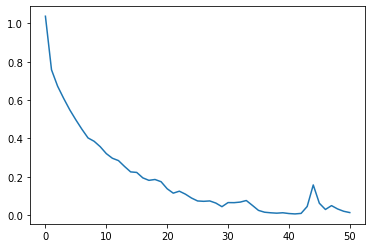

In [12]:
plt.plot(clf.loss_curve_)
plt.show()